# Anime Recommendation System

**AI/ML Capstone Project**

Aditya Kharote - 2020300029

Kunal Madrecha - 2020300034

In [1]:
# Configuration Parameters

recommendation_count = 10

In [155]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
import json
%matplotlib inline

In [94]:
# Loading Dataset
anime = pd.read_csv('data/anilist.csv')
anime = anime[['id', 'title_english', 'title_romaji', 'genres', 'format', 'episodes', 'mean_score', 'popularity']]
anime['genres'] = anime['genres'].map(lambda x: ','.join(json.loads(x)))
anime

,id,title_english,title_romaji,genres,format,episodes,mean_score,popularity
0,5793,NaN,Robo Crosser,Sci-Fi,TV,1.0,43.0,23
1,6504,NaN,Despera,"Drama,Sci-Fi",TV,NaN,NaN,1501
2,6585,The Dream Machine,Yume Miru Kikai,"Adventure,Fantasy,Sci-Fi",MOVIE,1.0,64.0,318
3,7242,The Inheritor of the Crescent Moon,Sengoku Gyoujin Dullahan: Kagen no Keishousha,"Action,Adventure,Drama,Mecha",TV,NaN,NaN,524
4,8144,The King's Daughter Cries for the Moon,The Moon: Tsuki ga Hoshii to Oujo-sama ga Naita,Adventure,MOVIE,NaN,NaN,166
...,...,...,...,...,...,...,...,...
16581,136880,NaN,BEASTARS FINAL SEASON,"Drama,Psychological,Slice of Life",ONA,NaN,NaN,10237
16582,137681,NaN,Xi Xing Ji: Da Yuan Hun,"Action,Adventure,Fantasy",ONA,NaN,NaN,30
16583,148080,NaN,(Title to be Announced),,ONA,1.0,NaN,218
16584,150654,Moonrise,MOONRISE,"Fantasy,Sci-Fi",ONA,NaN,NaN,1322


## Data Pre-Processing

In [158]:
anime.isnull().sum()

id                  0
title_english    8905
title_romaji        0
genres              0
format              0
episodes            0
mean_score          0
popularity          0
dtype: int64

In [118]:
anime['format'] = anime['format'].fillna('None')
anime['mean_score'] = anime['mean_score'].fillna(anime['mean_score'].median())
anime['episodes'] = anime['episodes'].fillna(anime['episodes'].median())
anime.isnull().sum()

id                  0
title_english    8905
title_romaji        0
genres              0
format              0
episodes            0
mean_score          0
popularity          0
dtype: int64

In [70]:
anime.head()

,id,title_romaji,genres,format,episodes,mean_score,popularity
0,5793,Robo Crosser,Sci-Fi,TV,1.0,43.0,23
1,6504,Despera,"Drama,Sci-Fi",TV,2.0,59.0,1501
2,6585,Yume Miru Kikai,"Adventure,Fantasy,Sci-Fi",MOVIE,1.0,64.0,318
3,7242,Sengoku Gyoujin Dullahan: Kagen no Keishousha,"Action,Adventure,Drama,Mecha",TV,2.0,59.0,524
4,8144,The Moon: Tsuki ga Hoshii to Oujo-sama ga Naita,Adventure,MOVIE,2.0,59.0,166


## Genre Analysis

(-0.5, 699.5, 740.5, -0.5)

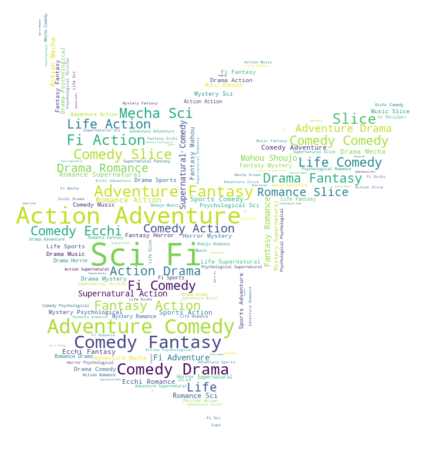

In [74]:
genre_list = anime['genres'].to_string()
mask = np.array(Image.open('assets/pikachu.jpg'))
wordcloud = WordCloud(background_color="white", mask=mask).generate(genre_list)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Feature Processing

In [72]:
dummies_type = pd.get_dummies(anime['format'])
dummies_genre = anime['genres'].str.get_dummies(sep=',')
dummies_genre

,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Horror,Mahou Shoujo,Mecha,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
16582,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16584,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [73]:
dummies_type

,MOVIE,MUSIC,None,ONA,OVA,SPECIAL,TV,TV_SHORT
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
16581,0,0,0,1,0,0,0,0
16582,0,0,0,1,0,0,0,0
16583,0,0,0,1,0,0,0,0
16584,0,0,0,1,0,0,0,0


In [75]:
X = pd.concat([dummies_genre, dummies_type, anime['episodes'], anime['mean_score'], anime['popularity']], axis=1)
X.head()

,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Horror,Mahou Shoujo,Mecha,Music,...,MUSIC,None,ONA,OVA,SPECIAL,TV,TV_SHORT,episodes,mean_score,popularity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.0,43.0,23
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2.0,59.0,1501
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1.0,64.0,318
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,2.0,59.0,524
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,59.0,166


In [76]:
scaler = MaxAbsScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00055,0.43,0.000037
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00110,0.59,0.002444
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00055,0.64,0.000518
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00110,0.59,0.000853
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00110,0.59,0.000270


## Nearest Neighbors To Find Recommendations

In [77]:
recommendations = NearestNeighbors(n_neighbors=(recommendation_count + 1), algorithm='ball_tree').fit(X)
neighbors = recommendations.kneighbors(X)
neighbors

(array([[0.00000000e+00, 1.16978170e-02, 1.19827782e-02, ...,
         6.15556891e-02, 8.11761671e-02, 9.53059108e-02],
        [0.00000000e+00, 1.57269310e-03, 1.33325108e-02, ...,
         1.00004675e+00, 1.00006844e+00, 1.00008714e+00],
        [0.00000000e+00, 3.02218260e-02, 3.24331696e-02, ...,
         2.02094752e-01, 1.00000008e+00, 1.00000011e+00],
        ...,
        [0.00000000e+00, 4.31432372e-04, 5.63093992e-04, ...,
         6.36730054e-04, 6.38376367e-04, 6.39204153e-04],
        [0.00000000e+00, 2.01600804e-02, 7.00817249e-02, ...,
         1.00000206e+00, 1.00000208e+00, 1.00000211e+00],
        [0.00000000e+00, 2.01877789e-04, 1.00040578e-02, ...,
         1.11756330e-01, 2.10000357e-01, 1.00000000e+00]]),
 array([[    0,  3836,  2328, ..., 11489,  1476,  1512],
        [    1,  4467,  1564, ..., 15676,  8093,  4909],
        [    2,  2273,  4291, ...,  1989, 11689, 10487],
        ...,
        [16583, 11573, 15796, ...,   181, 14852,   230],
        [16584, 13240, 1

In [78]:
anime_indices = neighbors[1]
anime_indices

array([[    0,  3836,  2328, ..., 11489,  1476,  1512],
       [    1,  4467,  1564, ..., 15676,  8093,  4909],
       [    2,  2273,  4291, ...,  1989, 11689, 10487],
       ...,
       [16583, 11573, 15796, ...,   181, 14852,   230],
       [16584, 13240, 13001, ...,   263,   120,   227],
       [16585, 14607, 12703, ..., 14843,  4860, 16567]], dtype=int64)

In [114]:
def get_series_index(x):
    for i, row in anime.iterrows():
        if str(row['title_romaji']).lower() == x.lower():
            return i
        if str(row['title_english']).lower() == x.lower():
            return i
    return -1

In [153]:
def get_distance(series, rec):
    return np.linalg.norm(X[series] - X[rec])

In [151]:
def get_recommendations(series):
    print('Recommendations for', series, ':')
    index = get_series_index(series)
    
    if index == -1:
        print('Series not found')
        return
        
    out = []
    
    for i in anime_indices[index][1:]:
        dist = get_distance(index, i)
        ser = [ anime.iloc[i]['id'], 
                anime.iloc[i]['title_romaji'], 
                anime.iloc[i]['genres'], 
                anime.iloc[i]['episodes'], 
                anime.iloc[i]['mean_score'],
                dist
              ]
        out.append(ser)
    return pd.DataFrame(out, columns=["id", "title_romaji", "genres", "episodes", "mean_score", "distance"])

In [159]:
get_recommendations('Steins;Gate')

Recommendations for Steins;Gate :


,id,title_romaji,genres,episodes,mean_score,distance
0,21127,Steins;Gate 0,"Drama,Psychological,Sci-Fi,Thriller",23.0,83.0,0.369745
1,110350,ID: INVADED,"Drama,Mystery,Psychological,Sci-Fi,Thriller",13.0,77.0,1.109550
2,7193,Aoi Bungaku Series,"Drama,Psychological,Thriller",12.0,74.0,1.142953
3,21190,Subete ga F ni Naru: THE PERFECT INSIDER,"Drama,Mystery,Psychological,Sci-Fi,Thriller",11.0,68.0,1.154837
4,20615,selector infected WIXOSS,"Drama,Psychological,Thriller",12.0,69.0,1.155104
5,20714,selector spread WIXOSS,"Drama,Psychological,Thriller",12.0,71.0,1.161306
6,100251,Dorei-ku The Animation,"Drama,Psychological,Thriller",12.0,54.0,1.202814
7,124131,Gekidol,"Drama,Psychological,Sci-Fi",12.0,51.0,1.216787
8,13601,PSYCHO-PASS,"Action,Psychological,Sci-Fi,Thriller",22.0,82.0,1.433254
9,98659,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e,"Drama,Psychological",12.0,77.0,1.437998
